Given a reduced version of the home credit data (attached in the form of a CSV
file). The full data [Gro18] can be accessed at the following url:https://www.kaggle.com/code/thomasseleck/extensive-eda-for-all-features-of-home-credit-data/data. This has 23 columns,
with the first 22 representing features and the last one being the target variable (0 or 1). Note that
this is a highly imbalanced dataset. The following are the required tasks (problem statement).
Some of the columns contain non-numeric (can be categorical) data. The choice is left to the user
to use/drop them (or any column for that matter). Lastly, please split (using any standard random
splitting routine) the given data in an 80-20 or 70-30 fashion (train-test ratio).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
import warnings
warnings.filterwarnings('ignore')

# Reading the Dataset

In [2]:
cred = pd.read_csv("hcdr-rev.csv")

In [3]:
cred.head()

,SK_ID_CURR,AMT_REQ_CREDIT_BUREAU_WEEK,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_ID_PUBLISH,AMT_REQ_CREDIT_BUREAU_QRT,REGION_RATING_CLIENT,AMT_INCOME_TOTAL,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_DAY,...,AMT_ANNUITY,DAYS_REGISTRATION,AMT_GOODS_PRICE,DAYS_BIRTH,AMT_REQ_CREDIT_BUREAU_MON,NAME_INCOME_TYPE,EXT_SOURCE_1,AMT_REQ_CREDIT_BUREAU_HOUR,REG_CITY_NOT_WORK_CITY,TARGET
0,130058,0,-434,2,-2161,0,2,202500.0,0.733815,0,...,35613.0,-2973,1350000.0,-9503,0,Commercial associate,0.635151,0,0,0
1,130059,0,-1610,0,-3818,0,1,135000.0,0.355639,0,...,49900.5,-4709,675000.0,-14652,0,Commercial associate,0.383777,0,0,0
2,130068,0,-205,2,-4958,0,2,225000.0,0.231439,0,...,9000.0,-3956,180000.0,-12418,0,Commercial associate,0.213944,0,1,0
3,130071,0,-263,3,-1631,0,1,112500.0,0.260856,0,...,13500.0,-7016,270000.0,-12948,0,Working,0.565716,0,1,0
4,130118,0,-2117,0,-3283,0,1,337500.0,0.646330,0,...,54283.5,-7594,1575000.0,-19719,3,Pensioner,0.517405,0,0,0


# Statistical Summary of the dataset

In [4]:
cred.describe()

,SK_ID_CURR,AMT_REQ_CREDIT_BUREAU_WEEK,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_ID_PUBLISH,AMT_REQ_CREDIT_BUREAU_QRT,REGION_RATING_CLIENT,AMT_INCOME_TOTAL,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_DAY,...,REGION_RATING_CLIENT_W_CITY,AMT_ANNUITY,DAYS_REGISTRATION,AMT_GOODS_PRICE,DAYS_BIRTH,AMT_REQ_CREDIT_BUREAU_MON,EXT_SOURCE_1,AMT_REQ_CREDIT_BUREAU_HOUR,REG_CITY_NOT_WORK_CITY,TARGET
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,197740.295700,0.034600,-1086.094200,1.774600,-3005.436200,0.258700,2.042600,2.032436e+05,0.493867,0.008300,...,2.019700,30423.101850,-4245.333500,6.090174e+05,-14397.554100,0.333000,0.489159,0.007100,0.274500,0.069200
std,50962.527114,0.207382,855.116442,1.751885,1500.941649,0.598841,0.518857,1.139263e+05,0.195712,0.112394,...,0.514916,15739.577119,3078.529518,4.080772e+05,3604.856091,1.021183,0.206680,0.087466,0.446284,0.253807
min,130058.000000,0.000000,-4092.000000,0.000000,-6265.000000,0.000000,1.000000,3.375000e+04,0.000527,0.000000,...,1.000000,3163.500000,-22113.000000,4.500000e+04,-25009.000000,0.000000,0.021382,0.000000,0.000000,0.000000
25%,151358.750000,0.000000,-1714.000000,0.000000,-4310.000000,0.000000,2.000000,1.350000e+05,0.347418,0.000000,...,2.000000,19125.000000,-6322.250000,2.700000e+05,-16690.750000,0.000000,0.325946,0.000000,0.000000,0.000000
50%,185064.500000,0.000000,-935.000000,1.000000,-3231.000000,0.000000,2.000000,1.800000e+05,0.513694,0.000000,...,2.000000,27652.500000,-3884.000000,4.725000e+05,-13926.500000,0.000000,0.488438,0.000000,0.000000,0.000000
75%,265019.000000,0.000000,-371.000000,3.000000,-1743.000000,0.000000,2.000000,2.385000e+05,0.652897,0.000000,...,2.000000,38939.625000,-1568.000000,9.000000e+05,-11552.500000,0.000000,0.655012,0.000000,1.000000,0.000000
max,286304.000000,6.000000,0.000000,17.000000,-1.000000,7.000000,3.000000,2.250000e+06,0.887664,5.000000,...,3.000000,225000.000000,0.000000,2.700000e+06,-7698.000000,16.000000,0.951624,2.000000,1.000000,1.000000


In [5]:
cred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_CURR                   10000 non-null  int64  
 1   AMT_REQ_CREDIT_BUREAU_WEEK   10000 non-null  int64  
 2   DAYS_LAST_PHONE_CHANGE       10000 non-null  int64  
 3   AMT_REQ_CREDIT_BUREAU_YEAR   10000 non-null  int64  
 4   DAYS_ID_PUBLISH              10000 non-null  int64  
 5   AMT_REQ_CREDIT_BUREAU_QRT    10000 non-null  int64  
 6   REGION_RATING_CLIENT         10000 non-null  int64  
 7   AMT_INCOME_TOTAL             10000 non-null  float64
 8   EXT_SOURCE_3                 10000 non-null  float64
 9   AMT_REQ_CREDIT_BUREAU_DAY    10000 non-null  int64  
 10  AMT_CREDIT                   10000 non-null  float64
 11  FLAG_EMP_PHONE               10000 non-null  int64  
 12  OWN_CAR_AGE                  10000 non-null  int64  
 13  DAYS_EMPLOYED    

In [6]:
cred.isna().sum().sum()

0

In [7]:
cred.columns

Index(['SK_ID_CURR', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'DAYS_ID_PUBLISH',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'REGION_RATING_CLIENT', 'AMT_INCOME_TOTAL',
       'EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_CREDIT',
       'FLAG_EMP_PHONE', 'OWN_CAR_AGE', 'DAYS_EMPLOYED', 'EXT_SOURCE_2',
       'REGION_RATING_CLIENT_W_CITY', 'AMT_ANNUITY', 'DAYS_REGISTRATION',
       'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'AMT_REQ_CREDIT_BUREAU_MON',
       'NAME_INCOME_TYPE', 'EXT_SOURCE_1', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'REG_CITY_NOT_WORK_CITY', 'TARGET'],
      dtype='object')

In [8]:
cred["NAME_INCOME_TYPE"].unique()

array(['Commercial associate', 'Working', 'Pensioner', 'State servant',
       'Businessman'], dtype=object)

In [9]:
# li = []
# for i in cred.columns:
#     li.append(cred[i].unique())
# li

In [10]:
# plt.figure(figsize =(16,12))
# sns.heatmap(cred.corr(),annot=True)

# Cleaning the dataset

In [11]:
credit=cred.replace({"NAME_INCOME_TYPE":{"Commercial associate" : 0, "Working" : 1, "Pensioner": 2, 'State servant':3, 'Businessman':4}})

In [12]:
credit

,SK_ID_CURR,AMT_REQ_CREDIT_BUREAU_WEEK,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_ID_PUBLISH,AMT_REQ_CREDIT_BUREAU_QRT,REGION_RATING_CLIENT,AMT_INCOME_TOTAL,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_DAY,...,AMT_ANNUITY,DAYS_REGISTRATION,AMT_GOODS_PRICE,DAYS_BIRTH,AMT_REQ_CREDIT_BUREAU_MON,NAME_INCOME_TYPE,EXT_SOURCE_1,AMT_REQ_CREDIT_BUREAU_HOUR,REG_CITY_NOT_WORK_CITY,TARGET
0,130058,0,-434,2,-2161,0,2,202500.0,0.733815,0,...,35613.0,-2973,1350000.0,-9503,0,0,0.635151,0,0,0
1,130059,0,-1610,0,-3818,0,1,135000.0,0.355639,0,...,49900.5,-4709,675000.0,-14652,0,0,0.383777,0,0,0
2,130068,0,-205,2,-4958,0,2,225000.0,0.231439,0,...,9000.0,-3956,180000.0,-12418,0,0,0.213944,0,1,0
3,130071,0,-263,3,-1631,0,1,112500.0,0.260856,0,...,13500.0,-7016,270000.0,-12948,0,1,0.565716,0,1,0
4,130118,0,-2117,0,-3283,0,1,337500.0,0.646330,0,...,54283.5,-7594,1575000.0,-19719,3,2,0.517405,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,286290,0,-1436,3,-3980,0,2,450000.0,0.399676,0,...,45000.0,-227,900000.0,-15200,0,0,0.599694,0,0,0
9996,286291,0,-1863,7,-3432,0,2,270000.0,0.481249,0,...,42205.5,-535,1530000.0,-10846,2,1,0.433261,0,0,1
9997,286297,0,-1322,2,-1487,0,1,121500.0,0.612704,0,...,25735.5,-3527,666000.0,-14674,0,0,0.590946,0,0,0
9998,286298,0,-802,0,-3766,0,2,180000.0,0.365617,0,...,9000.0,-1746,180000.0,-11097,0,1,0.724874,0,1,0


# Defining features and the response

In [13]:
X = credit.drop(['SK_ID_CURR', 'TARGET'], axis=1)
y = credit["TARGET"]

## Task 1

Build a classifier that gives more priority to false negatives over false positives. The
level of priority can be a knob and is left to the user’s choice.

# Split the dataset into training and testing sets

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [15]:
#(y_test == 1).sum(),(y_test == 0).sum()

# Normalizing the data for numerical stability

In [16]:
from sklearn.preprocessing import StandardScaler
scale_train = StandardScaler()
X_train = scale_train.fit_transform(X_train)

scale_test = StandardScaler()
X_test = scale_test.fit_transform(X_test)

# Fitting a logistic regression model to the training data

In [17]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

## Making predictions on the testing data

In [18]:
# SETTING THE DISCREMINATION THRESHOLD TO MAKE FALSE NEGATIVE OUR PRIORETY
#(We want to have few false negatives despite the cost of increasing the number of false positives)

disC_t = 0.05
predictions = model.predict_proba(X_test)

predictions = (predictions[::,1] > disC_t)*1

## Calculating the accuracy, recall,precision and F1 scores including the cfussion matrix of the model prediction

In [19]:
cmd = confusion_matrix(y_test, predictions)

TN, FP, FN, TP = cmd.ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

True Positive(TP)  =  121
False Positive(FP) =  819
True Negative(TN)  =  1037
False Negative(FN) =  23


## Calculating the accuracy, recall,precision and F1 scores including the cfussion matrix of the model prediction

In [20]:
print("The precision score is: %.2f" % precision_score( y_test, predictions))
print("The recall score is: %.2f" % recall_score( y_test, predictions))
print("Accuracy score is: %.2f" % accuracy_score( y_test, predictions))
print("The F1 score is: %.2f" % f1_score( y_test, predictions))

The precision score is: 0.13
The recall score is: 0.84
Accuracy score is: 0.58
The F1 score is: 0.22


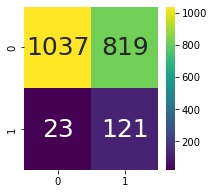

In [21]:
plt.figure(figsize = (3,3))
sns.heatmap(cmd, annot=True, annot_kws={"size": 25}, fmt="d", cmap="viridis", cbar=True)
plt.show()

This trade off may be preferable because false negatives would allow clints with "all other" to go through and be classified as "clints with payment difficulties", whereas false positives may cause "clints with payment difficults" be classified as "all others" in which the clints can challenge the decision without any cost implication.

## Plot of precision_recall_curve

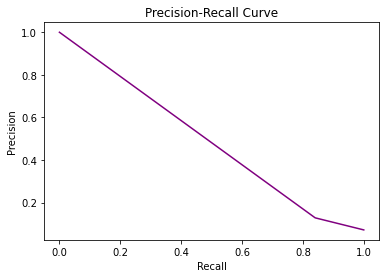

In [22]:
from sklearn.metrics import precision_recall_curve
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, predictions)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

### Task 2

Suppose a firm is trying to optimize (maximize) its revenue, which is dependent on the number of false positives and negatives from classification (consequence of the classifier). 

Say, the revenue is of the form:

$$Revenue = 10000 − 10 × False Negatives − 3 × False Positives$$

Build a classifier that helps with the above task.

## Building Random Forest Classifier

In [23]:
from sklearn.ensemble import RandomForestClassifier
RFmodel = RandomForestClassifier()
RFmodel.fit(X_train, y_train)

RandomForestClassifier()

## Making predictions on the testing data

In [24]:
RFpredictions = RFmodel.predict(X_test)

In [25]:
# SETTING THE DISCREMINATION THRESHOLD TO BALANCE THE FALSE NEGATIVE AND FALSE POSITIVE
#(We want to have few false negatives despite the cost of increasing the number of false positives)

dis_t = 0.1
RFpredict_D = RFmodel.predict_proba(X_test)

predict = (RFpredict_D[::,1] > dis_t)*1

In [26]:
RFcmdd = confusion_matrix(y_test, predict)

TN, FP, FN, TP = RFcmdd.ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

True Positive(TP)  =  91
False Positive(FP) =  614
True Negative(TN)  =  1242
False Negative(FN) =  53


In [27]:
print("The precision score is: %.2f" % precision_score( y_test, predict))
print("The recall score is: %.2f" % recall_score( y_test, predict))
print("Accuracy score is: %.2f" % accuracy_score( y_test, predict))
print("The F1 score is: %.2f" % f1_score( y_test, predict))

The precision score is: 0.13
The recall score is: 0.63
Accuracy score is: 0.67
The F1 score is: 0.21


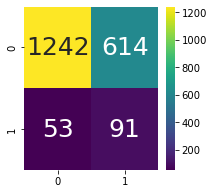

In [28]:
plt.figure(figsize = (3,3))
sns.heatmap(RFcmdd, annot=True, annot_kws={"size": 25}, fmt="d", cmap="viridis", cbar=True)
plt.show()

A false negative (all others missed) may have a financial cost on both the user and the institution, while a false positive ( clints with payment difficults incorrectly flagged as all others) may also decrease user happiness. Therefore, the balance between false negative and false positive is required.

## Plot of precision_recall_curve

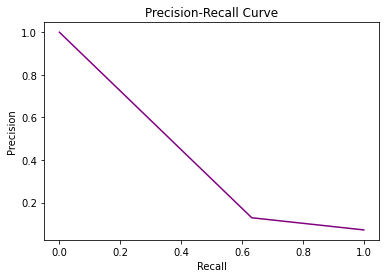

In [29]:
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, predict)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

In [30]:
Revenue = 10000 - 10 * FN - 3 * FP
print('Optimized Revenue = ', Revenue)

Optimized Revenue =  7628


## Task 3 (Non-coding)

 Suppose you are asked to remove a few columns from the above data (features) to help with speedup. Which columns would be your preference and why?

## Columns:
'SK_ID_CURR', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'DAYS_ID_PUBLISH',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'REGION_RATING_CLIENT', 'AMT_INCOME_TOTAL',
       'EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_CREDIT',
       'FLAG_EMP_PHONE', 'OWN_CAR_AGE', 'DAYS_EMPLOYED', 'EXT_SOURCE_2',
       'REGION_RATING_CLIENT_W_CITY', 'AMT_ANNUITY', 'DAYS_REGISTRATION',
       'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'AMT_REQ_CREDIT_BUREAU_MON',
       'NAME_INCOME_TYPE', 'EXT_SOURCE_1', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'REG_CITY_NOT_WORK_CITY', 'TARGET'

## My preference would be:
1. SK_ID_CURR: Because it has nothing to contribute to the decision of the model (it is just for sample identification)
2. AMT_GOODS_PRICE: Because it is most likely to be equal to the amount of the loan credited (AMT_CREDIT) , both features will be highly correlated.  
3. OWN_CAR_AGE: Because age of client's car might not necessary to have anything to do with the decision classes 
4. EXT_SOURCE_2 and EXT_SOURCE_1: Because Normalized score from external data source might not necessary cotributing to the decision of our model.
5. DAYS_BIRTH: Client's age in days at the time of application many not necessary impact the decision to a large extent.